### 데이터 구조 분석

In [1]:
import pandas as pd
import os

# 데이터 불러오기
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/sample_submission.csv')

print(train_df.head())
print(train_df.info())
print(train_df['target'].value_counts())


                     ID  target
0  002f99746285dfdd.jpg      16
1  008ccd231e1fea5d.jpg      10
2  008f5911bfda7695.jpg      10
3  009235e4c9c07af5.jpg       4
4  00b2f44967580c74.jpg      16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      1570 non-null   object
 1   target  1570 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.7+ KB
None
target
16    100
10    100
0     100
3     100
12    100
8     100
2     100
11    100
7     100
9     100
15    100
5     100
4     100
6     100
13     74
14     50
1      46
Name: count, dtype: int64


### 클래스 분포 시각화

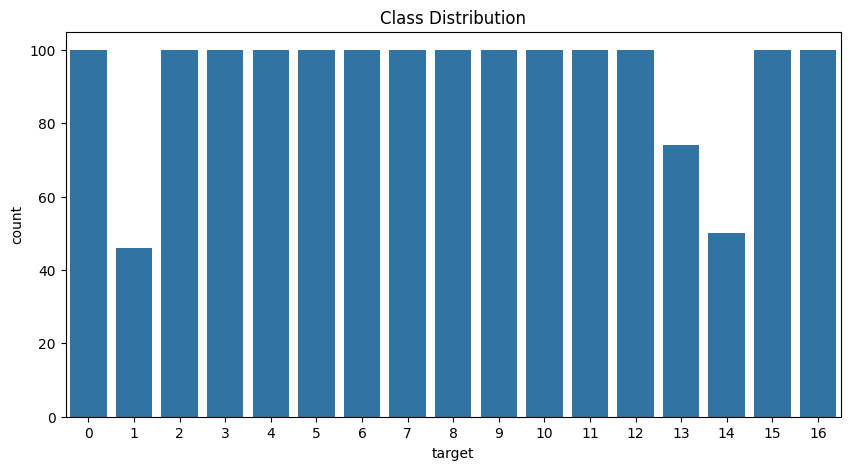

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=train_df, x='target', order=sorted(train_df['target'].unique()))
plt.title('Class Distribution')
plt.show()


### 이미지 데이터 확인

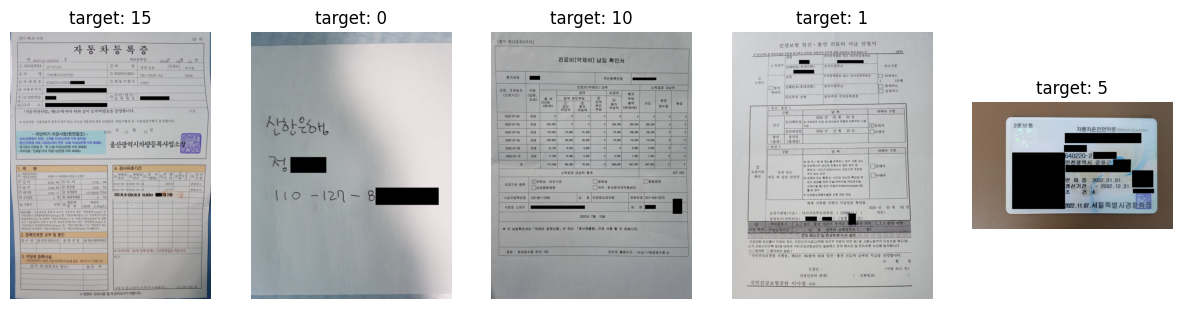

In [11]:
from PIL import Image
import matplotlib.pyplot as plt
import os

train_img_dir = '../data/train/'

# 예시 이미지 몇 개 확인
sample_images = train_df['ID'].sample(5).values

plt.figure(figsize=(15,5))
for i, img_name in enumerate(sample_images):
    img = Image.open(os.path.join(train_img_dir, img_name))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.title(f"target: {train_df.loc[train_df['ID']==img_name, 'target'].values[0]}")
    plt.axis('off')
plt.show()


### 이미지 크기/비율 분석

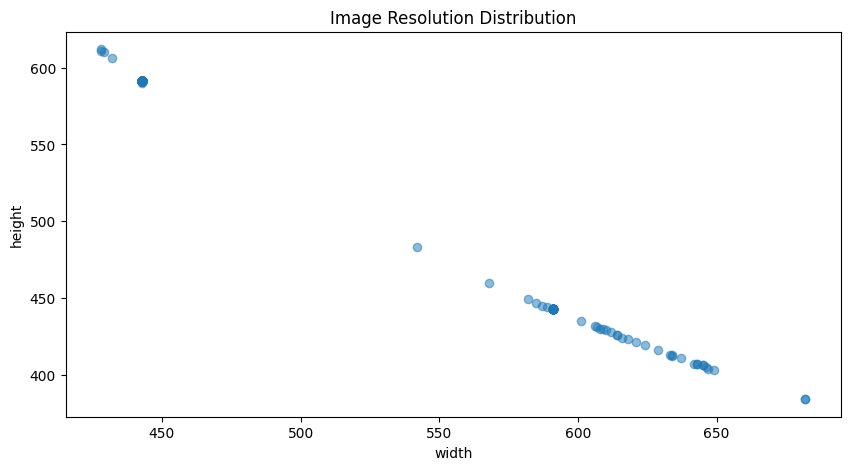

In [8]:
from PIL import Image
import numpy as np

widths, heights = [], []
for img_name in train_df['ID'].sample(200):  # 200개만 예시로
    with Image.open(os.path.join(train_img_dir, img_name)) as img:
        w, h = img.size
        widths.append(w)
        heights.append(h)

plt.figure(figsize=(10,5))
plt.scatter(widths, heights, alpha=0.5)
plt.xlabel('width')
plt.ylabel('height')
plt.title('Image Resolution Distribution')
plt.show()


In [18]:
import numpy as np

print("평균 width:", np.mean(widths))
print("평균 height:", np.mean(heights))

if np.mean(widths) > 500 or np.mean(heights) > 500:
    print("⚠️ 평균 해상도가 높아요. 128x128로 줄이면 정보 손실이 클 수 있습니다.")
else:
    print("✅ 128x128로 충분합니다.")



평균 width: 498.095
평균 height: 537.54
⚠️ 평균 해상도가 높아요. 128x128로 줄이면 정보 손실이 클 수 있습니다.


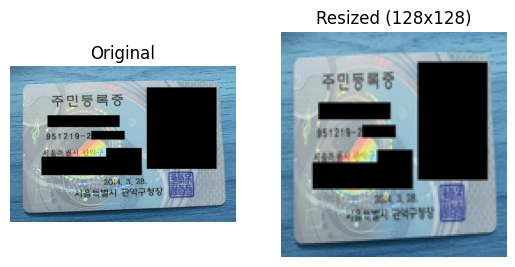

In [17]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('../data/train/0a1b8d3c52d64052.jpg')

# 리사이즈 전
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

# 리사이즈 후
plt.subplot(1,2,2)
plt.imshow(img.resize((128,128)))
# plt.imshow(img.resize((224,224)))
# plt.imshow(img.resize((256,256)))
plt.title("Resized (128x128)")
plt.axis('off')

plt.show()


⚙️ 자동 진단 + 권장 입력 크기 추천 코드

아래 코드를 실행하면
1️⃣ 이미지의 전체 통계,
2️⃣ 비율 분포 진단,
3️⃣ 왜곡 위험도 평가,
4️⃣ 권장 img_size (예: 128/224/256 등)를 추천해줍니다.

📊 이미지 크기 통계 요약
- 평균 width: 498.1
- 평균 height: 537.5
- 표준편차 width: 78.8
- 표준편차 height: 76.0
- 평균 비율(width/height): 0.97
- 비율 표준편차: 0.32


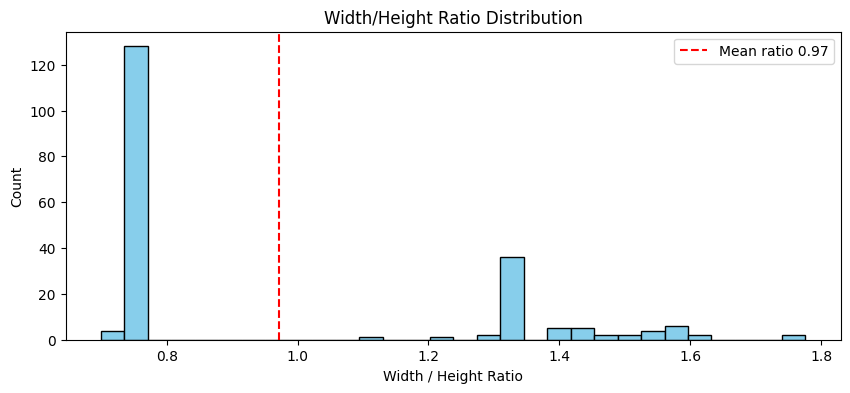

⚠️ 다양한 가로세로 비율이 존재합니다. 단순한 128x128 리사이즈 시 왜곡이 발생할 수 있습니다.
→ 비율 유지 리사이즈(A.PadIfNeeded) 또는 CenterCrop 적용을 권장합니다.
📏 중간 해상도입니다. 128x128 ~ 224x224 정도가 적절합니다.

💡 팁: 데이터 증강 시 아래 구성을 고려해보세요.
A.Compose([
    A.Resize(height=img_size, width=img_size),
    A.PadIfNeeded(min_height=img_size, min_width=img_size, border_mode=0),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ 통계 요약
mean_w, mean_h = np.mean(widths), np.mean(heights)
std_w, std_h = np.std(widths), np.std(heights)
ratio = np.array(widths) / np.array(heights)

print("📊 이미지 크기 통계 요약")
print(f"- 평균 width: {mean_w:.1f}")
print(f"- 평균 height: {mean_h:.1f}")
print(f"- 표준편차 width: {std_w:.1f}")
print(f"- 표준편차 height: {std_h:.1f}")
print(f"- 평균 비율(width/height): {np.mean(ratio):.2f}")
print(f"- 비율 표준편차: {np.std(ratio):.2f}")

# 2️⃣ 비율 시각화
plt.figure(figsize=(10,4))
plt.hist(ratio, bins=30, color='skyblue', edgecolor='black')
plt.axvline(np.mean(ratio), color='red', linestyle='--', label=f'Mean ratio {np.mean(ratio):.2f}')
plt.title("Width/Height Ratio Distribution")
plt.xlabel("Width / Height Ratio")
plt.ylabel("Count")
plt.legend()
plt.show()

# 3️⃣ 왜곡 위험 진단
if np.std(ratio) > 0.2:
    print("⚠️ 다양한 가로세로 비율이 존재합니다. 단순한 128x128 리사이즈 시 왜곡이 발생할 수 있습니다.")
    print("→ 비율 유지 리사이즈(A.PadIfNeeded) 또는 CenterCrop 적용을 권장합니다.")
else:
    print("✅ 대부분 비슷한 비율입니다. 일반적인 Resize로 충분합니다.")

# 4️⃣ 권장 이미지 크기 계산
if mean_w > 700 or mean_h > 700:
    print("📏 평균 해상도가 높아요. 224x224 이상 사용을 추천합니다.")
elif mean_w > 400 or mean_h > 400:
    print("📏 중간 해상도입니다. 128x128 ~ 224x224 정도가 적절합니다.")
else:
    print("📏 이미지가 작습니다. 128x128으로 충분합니다.")


### 클래스별 대표 이미지 시각화

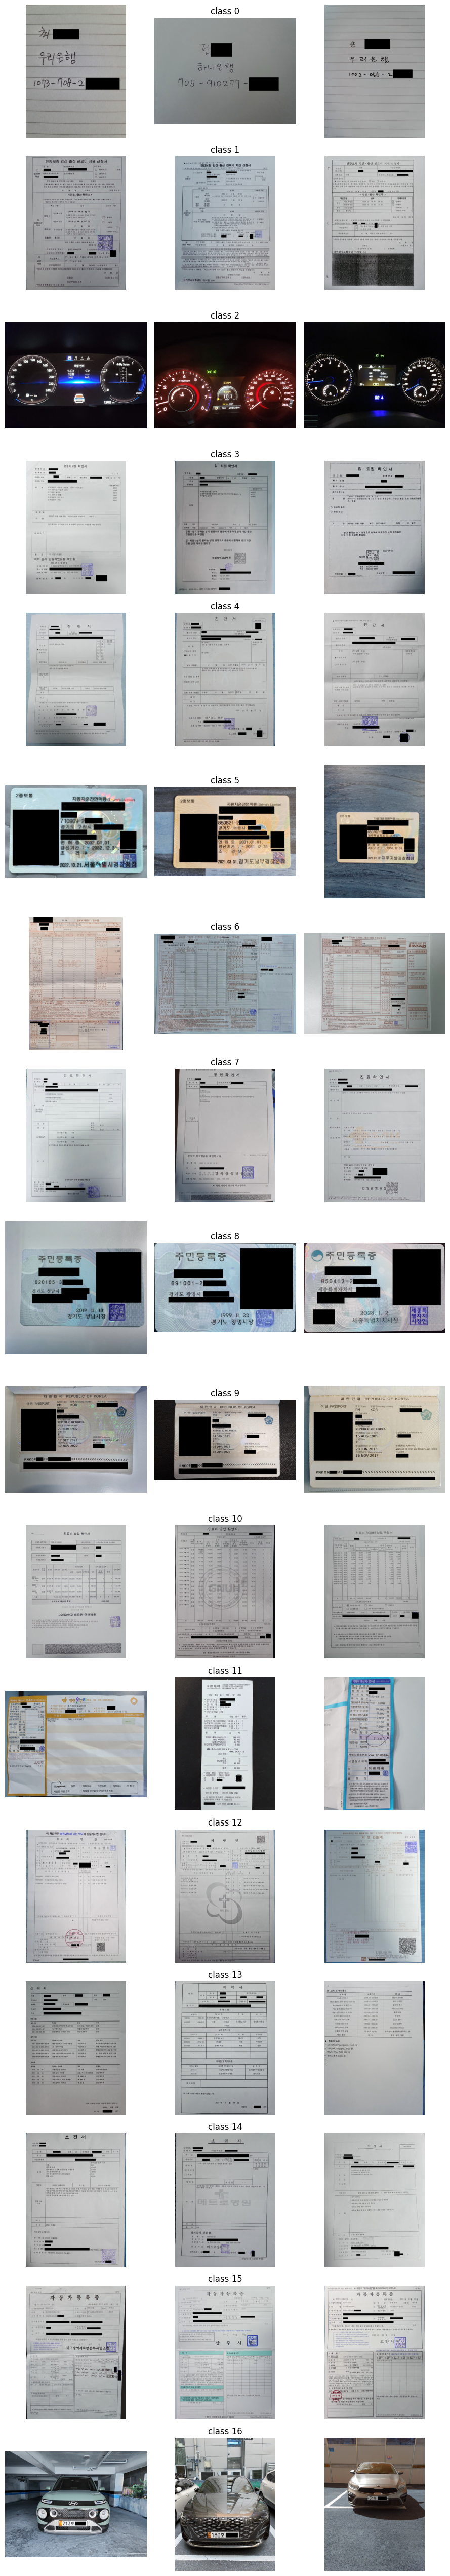

In [9]:
num_classes = train_df['target'].nunique()
train_img_dir = '../data/train/'

fig, axes = plt.subplots(num_classes, 3, figsize=(9, num_classes*3))

for cls in range(num_classes):
    samples = train_df[train_df['target']==cls]['ID'].sample(3).values
    for i, img_name in enumerate(samples):
        img = Image.open(os.path.join(train_img_dir, img_name))
        axes[cls, i].imshow(img)
        axes[cls, i].axis('off')
        if i == 1:
            axes[cls, i].set_title(f'class {cls}')
plt.tight_layout()
plt.show()


### Train/Test 이미지 시각적 비교

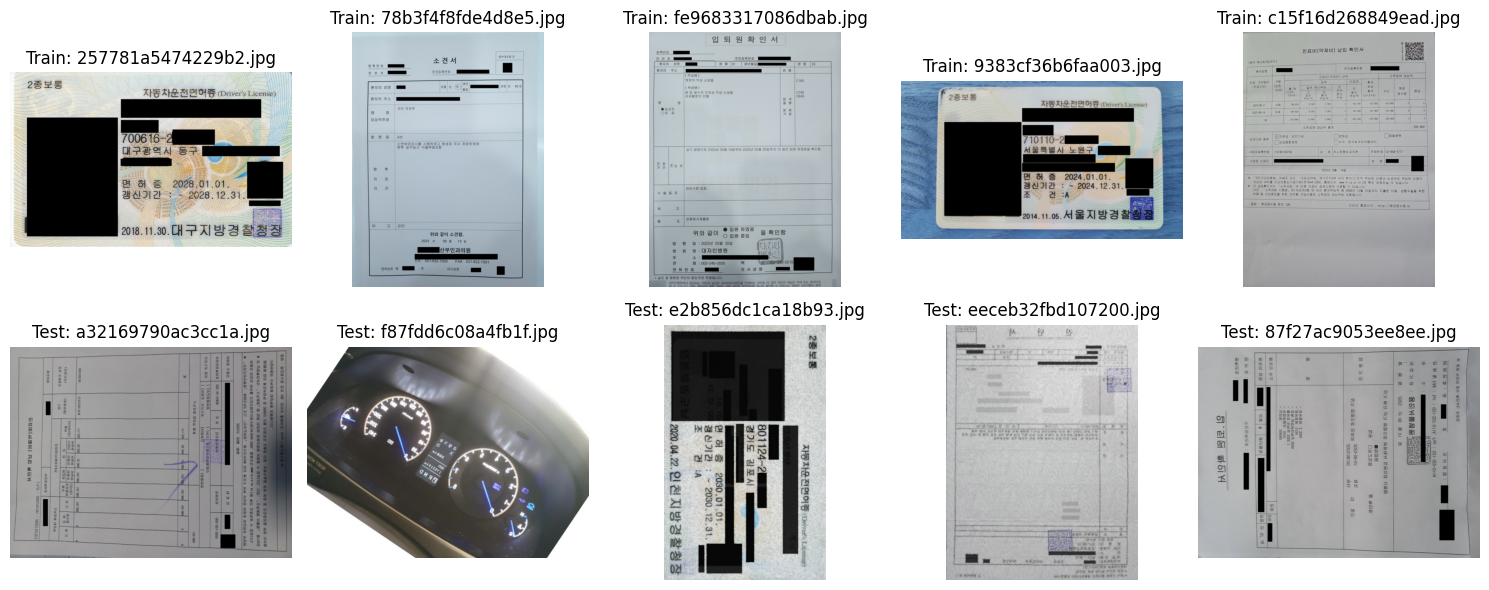

In [20]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import os

train_dir = "../data/train/"
test_dir = "../data/test/"

train_imgs = random.sample(os.listdir(train_dir), 5)
test_imgs = random.sample(os.listdir(test_dir), 5)

fig, axes = plt.subplots(2, 5, figsize=(15,6))
for i, img_name in enumerate(train_imgs):
    img = Image.open(os.path.join(train_dir, img_name))
    axes[0, i].imshow(img)
    axes[0, i].set_title(f"Train: {img_name}")
    axes[0, i].axis("off")

for i, img_name in enumerate(test_imgs):
    img = Image.open(os.path.join(test_dir, img_name))
    axes[1, i].imshow(img)
    axes[1, i].set_title(f"Test: {img_name}")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# 색상 정보 통계 비교 (RGB 평균/표준편차)
import numpy as np
from tqdm import tqdm
from PIL import Image

def get_color_stats(img_dir, n_samples=300):
    files = os.listdir(img_dir)[:n_samples]
    means, stds = [], []
    for f in tqdm(files):
        img = np.array(Image.open(os.path.join(img_dir, f)).convert("RGB")) / 255.
        means.append(np.mean(img, axis=(0,1)))
        stds.append(np.std(img, axis=(0,1)))
    return np.mean(means, axis=0), np.mean(stds, axis=0)

train_mean, train_std = get_color_stats("../data/train/")
test_mean, test_std = get_color_stats("../data/test/")

print("Train mean/std:", train_mean, train_std)
print("Test mean/std:", test_mean, test_std)


100%|██████████| 300/300 [00:03<00:00, 78.68it/s]

Train mean/std: [0.57537036 0.5863516  0.59331266] [0.1918496  0.18982887 0.18840265]
Test mean/std: [0.67941238 0.68383244 0.68676239] [0.1902883  0.1884362  0.18691992]


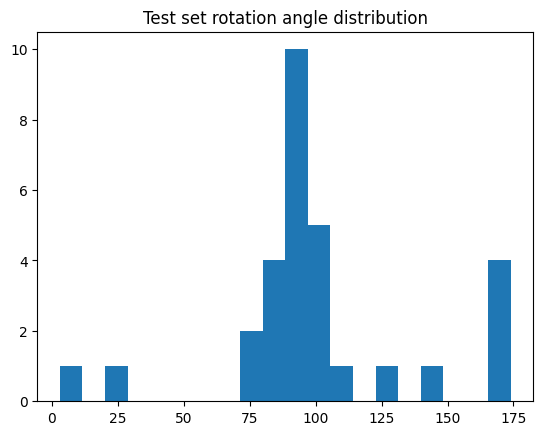

In [22]:
# 회전·기울기 문제 대비
import cv2
import math

def estimate_rotation_angle(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img, 50, 150)
    lines = cv2.HoughLines(edges, 1, np.pi/180, 100)
    if lines is None:
        return 0
    angles = [(theta * 180 / np.pi) for rho, theta in lines[:,0]]
    return np.median(angles)

angles = [estimate_rotation_angle(os.path.join("../data/test/", f))
          for f in random.sample(os.listdir("../data/test/"), 30)]
plt.hist(angles, bins=20)
plt.title("Test set rotation angle distribution")
plt.show()
